# Real Estate Prices in Ames, Iowa

In [1]:
import pandas as pd
trainFrame=pd.read_csv('train.csv', index_col='Id') #Train data set.

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_rows', 120)
#dont put the ...

In [4]:
trainFrame.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

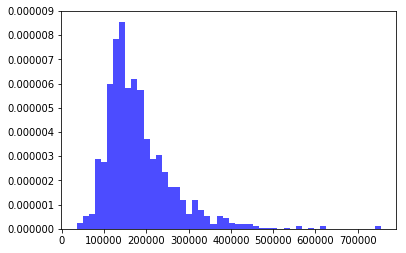

In [5]:
histogramBinSize = 50 # Making histograms based on our more significant columns.
plt.hist(trainFrame['SalePrice'], histogramBinSize, normed = 1, facecolor = 'blue', alpha = 0.7)
plt.show()

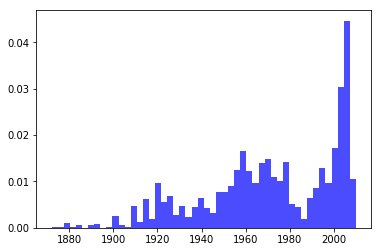

In [6]:
plt.hist(trainFrame['YearBuilt'], histogramBinSize, normed = 1, facecolor = 'blue', alpha = 0.7)
plt.show()

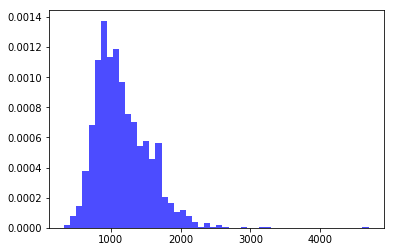

In [7]:
plt.hist(trainFrame['1stFlrSF'], histogramBinSize, normed = 1, facecolor = 'blue', alpha = 0.7)
plt.show()

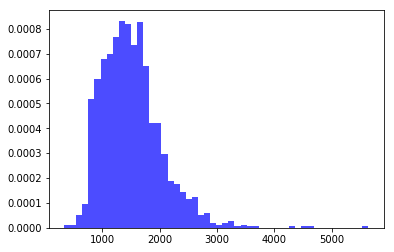

In [8]:
plt.hist(trainFrame['GrLivArea'], histogramBinSize, normed = 1, facecolor = 'blue', alpha = 0.7)
plt.show()

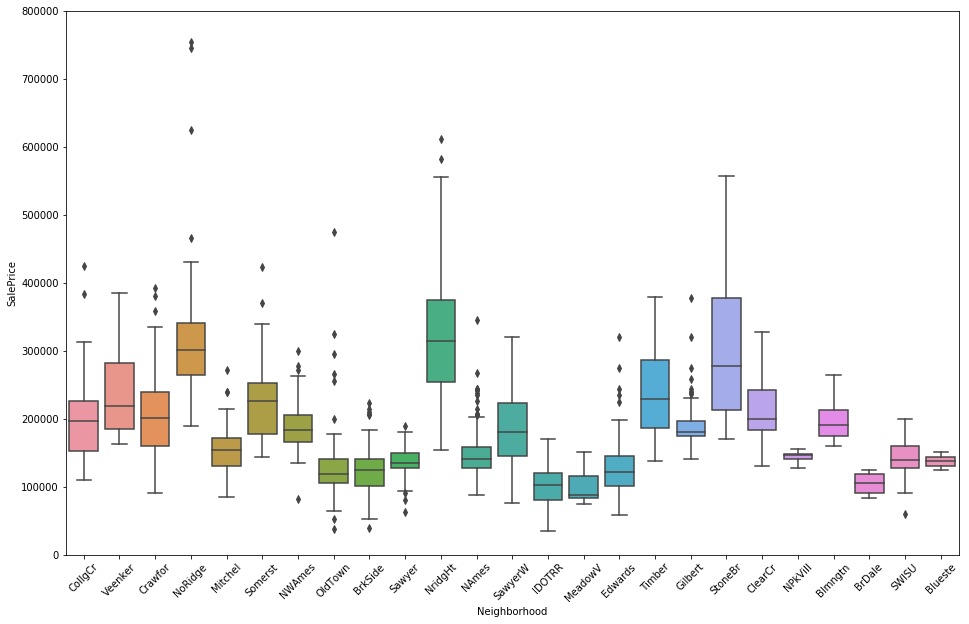

In [9]:
data = pd.concat([trainFrame['SalePrice'], trainFrame['Neighborhood']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=trainFrame['Neighborhood'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

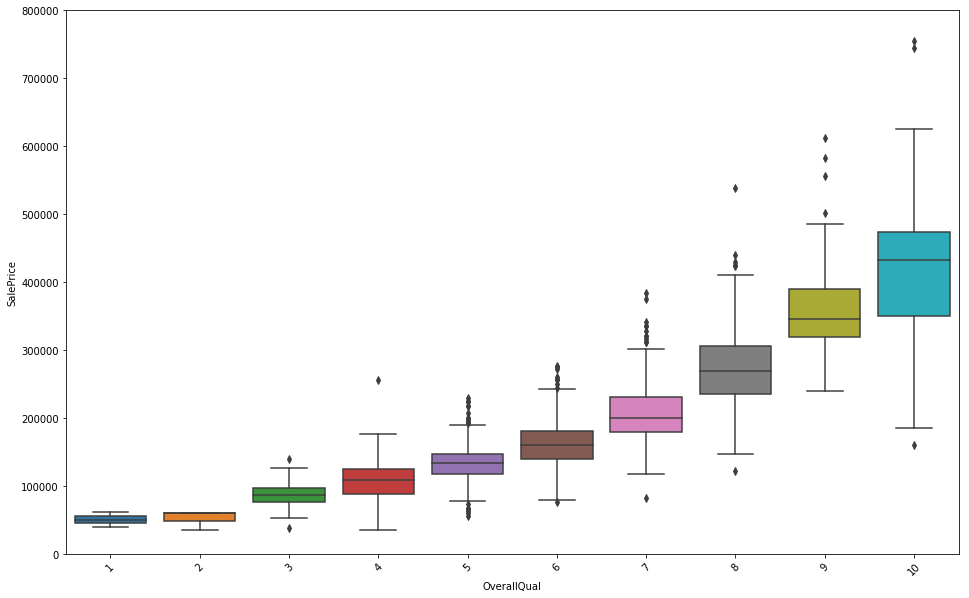

In [10]:
data = pd.concat([trainFrame['SalePrice'], trainFrame['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=trainFrame['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

Based on a cursory correlation, the most relevant and significant columns are: OverallQual (Overall Quality), GrLivArea (size of living room), GarageCars (Garage Car Capacity), 1stFloorSF (First floor area), YearBuilt (year home was built), YearRemodAdd (year of home remodel), ***

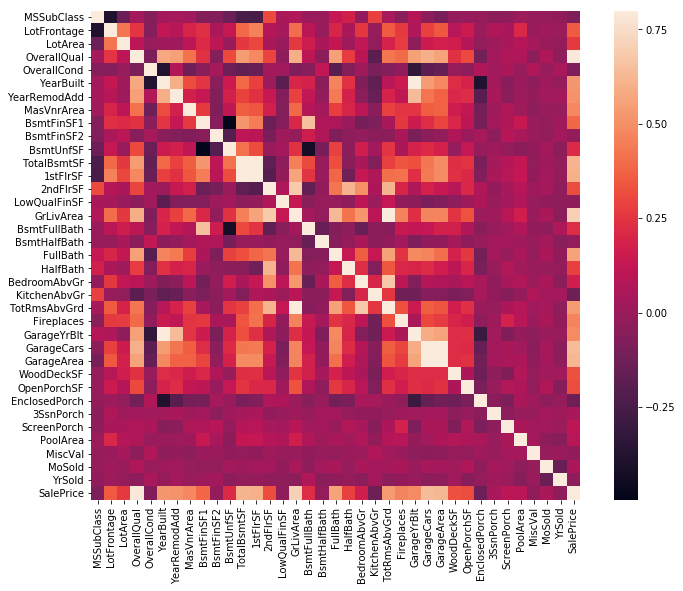

In [11]:
corrmat = trainFrame.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#Get rid of features that correlate to each other/dont at all to sales price


In [12]:
columnsToRemove = ['Alley','FireplaceQu', 'PoolArea','PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt',
                    'GarageArea','Exterior1st', 'Exterior2nd','ExterQual', 'ExterCond', '3SsnPorch', 'ScreenPorch',
       'RoofMatl','RoofStyle','BsmtFullBath' ,'MoSold', 'YrSold','MSZoning','Street','BldgType',
       'LandContour', 'Utilities', 'LotConfig','MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure','GarageFinish','Condition1','GarageQual', 'GarageCond','GarageType','KitchenQual', 'Condition2' , 'LandSlope','MSSubClass','LotShape','KitchenAbvGr','BsmtFinType1', 'BsmtFinType2','TotRmsAbvGrd', 'MiscVal', 'OverallCond', 'LotArea', 'EnclosedPorch', 
                  'BsmtQual','Electrical','Fireplaces','Functional','SaleType','PavedDrive', 'SaleCondition','CentralAir','BsmtHalfBath', 'BsmtCond','Heating', 'HeatingQC',
       'BsmtExposure','FullBath', 'HalfBath',]

In [13]:

criticalColumnSet = [ 'LotFrontage',
       'Neighborhood', 
       'OverallQual','GarageCars', 'YearBuilt', 'YearRemodAdd',   
         'FirstFlrSF','SecondFlrSF' ,'TotalFloorSF','TotalSF','TotalBathrooms'
       ,'GrLivArea', 
       'BedroomAbvGr',
        'TotalBsmtSF','HouseStyle',  
        'WoodDeckSF', 'OpenPorchSF',  'SalePrice', 'TotalBathrooms']

In [14]:
criticalColumnCategorical = [
       'Neighborhood', 
       'BedroomAbvGr', 'HouseStyle']

In [15]:
trainFrame['TotalBathrooms'] = trainFrame.FullBath + .5 * trainFrame.HalfBath + \
    trainFrame.BsmtFullBath + .5 * trainFrame.BsmtHalfBath
trainFrame['TotalFloorSF'] = trainFrame['1stFlrSF'] + trainFrame['2ndFlrSF']
trainFrame['TotalSF'] = trainFrame.TotalBsmtSF + trainFrame.GrLivArea



In [16]:
trainFrame

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms,TotalFloorSF,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.5,1710,2566
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.5,1262,2524
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.5,1786,2706
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.0,1717,2473
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3.5,2198,3343
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,2.5,1362,2158
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,3.0,1694,3380
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,3.5,2090,3197
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,200

In [17]:
trainFrame.drop(labels = columnsToRemove, axis = 1, inplace = True)
trainFrame
trainFrame.rename(columns={'HouseStyle_1.5Fin':'HouseStyle1_5fin', 'MSZoning_C (all)':'MSZoning_C', 'HouseStyle_1.5Unf': 'HouseStyle_1_5Unf', 'HouseStyle_2.5Fin': 'HouseStyle_2_5Fin', 'HouseStyle_2.5Unf': 'HouseStyle_2_5Unf', '1stFlrSF': 'FirstFlrSF', '2ndFlrSF':'SecondFlrSF'}, inplace=True)

In [18]:
numeric_cols = [x for x in criticalColumnSet if x not in criticalColumnCategorical]
numeric_cols
train_Expanded= trainFrame
for col in numeric_cols:
    train_Expanded[col] = train_Expanded[col].astype('float')
train_Expanded.YearBuilt=train_Expanded.YearBuilt.astype('int')
train_Expanded.YearRemodAdd=train_Expanded.YearRemodAdd.astype('int')
train_Expanded.dtypes
train_Expanded.dropna()
full = pd.get_dummies(trainFrame, columns = criticalColumnCategorical)
numeric_cols
full

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,TotalBathrooms,TotalFloorSF,TotalSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,7.0,2003,2003,196.0,706,0,150,856.0,856.0,854.0,0,1710.0,2.0,0.0,61.0,208500.0,3.5,1710.0,2566.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,80.0,6.0,1976,1976,0.0,978,0,284,1262.0,1262.0,0.0,0,1262.0,2.0,298.0,0.0,181500.0,2.5,1262.0,2524.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,68.0,7.0,2001,2002,162.0,486,0,434,920.0,920.0,866.0,0,1786.0,2.0,0.0,42.0,223500.0,3.5,1786.0,2706.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,60.0,7.0,1915,1970,0.0,216,0,540,756.0,961.0,756.0,0,1717.0,3.0,0.0,35.0,140000.0,2.0,1717.0,2473.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,84.0,8.0,2000,2000,350.0,655,0,490,1145.0,1145.0,1053.0,0,2198.0,3.0,192.0,84.0,250000.0,3.5,2198.0,3343.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,85.0,5.0,1993,1995,0.0,732,0,64,796.0,796.0,566.0,0,1362.0,2.0,40.0,30.0,143000.0,2.5,1362.0,2158.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,75.0,8.0,2004,2005,186.0,1369,0,317,1686.0,1694.0,0.0,0,1694.0,2.0,255.0,57.0,307000.0,3.0,1694.0,3380.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,NaN,7.0,1973,1973,240.0,859,32,216,1107.0,1107.0,983.0,0,2090.0,2.0,235.0,204.0,200000.0,3.5,2090.0,3197.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,51.0,7.0,1931,1950,0.0,0,0,952,952.0,1022.0,752.0,0,1774.0,2.0,90.0,0.0,129900.0,2.0,1774.0,2726.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
colz = list(full)
colz.insert(0,colz.pop(colz.index('SalePrice')))
full = full.ix[:,colz]
target = full.SalePrice
features = full.iloc[:,1:]
features

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,GarageCars,WoodDeckSF,OpenPorchSF,TotalBathrooms,TotalFloorSF,TotalSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,7.0,2003,2003,196.0,706,0,150,856.0,856.0,854.0,0,1710.0,2.0,0.0,61.0,3.5,1710.0,2566.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,80.0,6.0,1976,1976,0.0,978,0,284,1262.0,1262.0,0.0,0,1262.0,2.0,298.0,0.0,2.5,1262.0,2524.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,68.0,7.0,2001,2002,162.0,486,0,434,920.0,920.0,866.0,0,1786.0,2.0,0.0,42.0,3.5,1786.0,2706.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,60.0,7.0,1915,1970,0.0,216,0,540,756.0,961.0,756.0,0,1717.0,3.0,0.0,35.0,2.0,1717.0,2473.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,84.0,8.0,2000,2000,350.0,655,0,490,1145.0,1145.0,1053.0,0,2198.0,3.0,192.0,84.0,3.5,2198.0,3343.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,85.0,5.0,1993,1995,0.0,732,0,64,796.0,796.0,566.0,0,1362.0,2.0,40.0,30.0,2.5,1362.0,2158.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,75.0,8.0,2004,2005,186.0,1369,0,317,1686.0,1694.0,0.0,0,1694.0,2.0,255.0,57.0,3.0,1694.0,3380.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,NaN,7.0,1973,1973,240.0,859,32,216,1107.0,1107.0,983.0,0,2090.0,2.0,235.0,204.0,3.5,2090.0,3197.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,51.0,7.0,1931,1950,0.0,0,0,952,952.0,1022.0,752.0,0,1774.0,2.0,90.0,0.0,2.0,1774.0,2726.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [20]:
# def information_selector(X, y, scoring, k=5):
#     selector = SelectKBest(score_func=scoring, k=k)
#     selector.fit(X, y)
#     return X[X.columns[selector.get_support(indices=True)]]
# # test = SelectKBest(score_func=mutual_info_regression, k=5)
# fit = test.fit(full[numeric_cols], full.SalePrice)

In [21]:
print(abs(full[numeric_cols].corr()['SalePrice']).sort_values(ascending=False))
#had to trim the numeric values.
#removing numeric below .5
dropnums=['LotFrontage','OpenPorchSF','SecondFlrSF','WoodDeckSF']
full.drop(labels =dropnums , axis=1,inplace = True)

SalePrice         1.000000
OverallQual       0.790982
TotalSF           0.778959
TotalFloorSF      0.716883
GrLivArea         0.708624
GarageCars        0.640409
TotalBathrooms    0.631731
TotalBathrooms    0.631731
TotalBsmtSF       0.613581
FirstFlrSF        0.605852
YearBuilt         0.522897
YearRemodAdd      0.507101
LotFrontage       0.351799
WoodDeckSF        0.324413
SecondFlrSF       0.319334
OpenPorchSF       0.315856
Name: SalePrice, dtype: float64


In [22]:
numeric_2 = [x for x in numeric_cols if x not in dropnums]
visual=full[numeric_2]

#open image in new tab, observe
#prices are increasing faster over time
#LOST THIS S

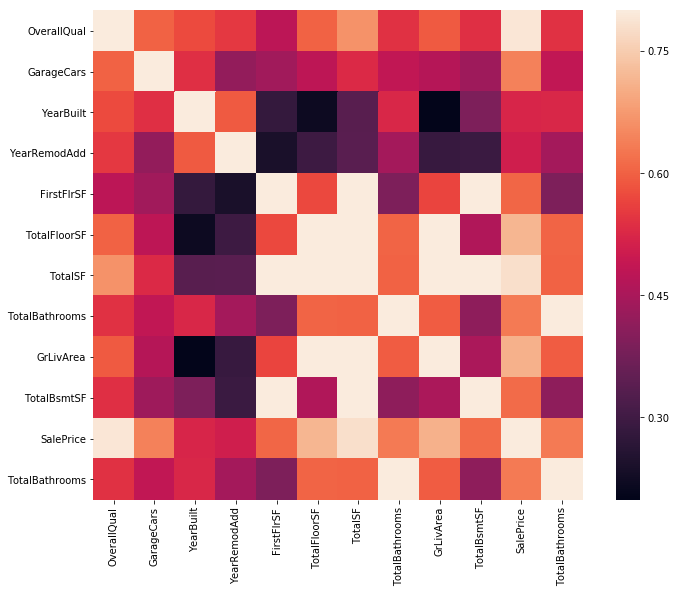

In [23]:
corrmat = visual.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [24]:
remove = ['BsmtFinSF1','BsmtFinSF2','FirstFlrSF','MasVnrArea','GrLivArea','LowQualFinSF','TotalFloorSF','BsmtUnfSF']
full.drop(labels = remove, axis = 1, inplace = True)

In [25]:
full

,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GarageCars,TotalBathrooms,TotalSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,208500.0,7.0,2003,2003,856.0,2.0,3.5,2566.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,181500.0,6.0,1976,1976,1262.0,2.0,2.5,2524.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,223500.0,7.0,2001,2002,920.0,2.0,3.5,2706.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,140000.0,7.0,1915,1970,756.0,3.0,2.0,2473.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,250000.0,8.0,2000,2000,1145.0,3.0,3.5,3343.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,143000.0,5.0,1993,1995,796.0,2.0,2.5,2158.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,307000.0,8.0,2004,2005,1686.0,2.0,3.0,3380.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,200000.0,7.0,1973,1973,1107.0,2.0,3.5,3197.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,129900.0,7.0,1931,1950,952.0,2.0,2.0,2726.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
full.rename(columns={'HouseStyle_1.5Fin':'HouseStyle1_5fin', 'MSZoning_C (all)':'MSZoning_C', 'HouseStyle_1.5Unf': 'HouseStyle_1_5Unf', 'HouseStyle_2.5Fin': 'HouseStyle_2_5Fin', 'HouseStyle_2.5Unf': 'HouseStyle_2_5Unf', '1stFlrSF': 'FirstFlrSF', '2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThreeSsnPorch'}, inplace=True)
data_ols=full.copy()

In [27]:
outcome = 'SalePrice'
predictors = data_ols.drop('SalePrice', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     147.3
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        04:21:07   Log-Likelihood:                -17275.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1414   BIC:                         3.488e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
OverallQual           1.549e+04   1185.888     13.064      0.000    1.32e+04    1.78e+04
YearBuilt               34.8376     71.303      0.489      0.625    -105.034     174.709
YearRemodAdd           238.5521     60.065      3.972      0.000     120.725     356.379
TotalBsmtSF            -46.4672      6.458     -7.196      0.000     -59.135     -33.800
GarageCars            1.075e+04   1688.764      6.367      0.000    7439.954    1.41e+04
TotalBathrooms        1.037e+04   1716.967      6.041      0.000    7003.608    1.37e+04
TotalSF                 57.1348      3.935     14.521      0.000      49.416      64.853
Neighborhood_Blmngtn -1.074e+05   2.57e+04     -4.172      0.000   -1.58e+05   -5.69e+04
Neighborhood_Blueste -1.084e+05   3.24e+04     -3.342      0.001   -1.72e+05   -4.48e+04
Neighborhood_BrDale  -1.037e+05    2.4e+04     -4.318      0.000   -1.51e+05   -5.66e+04
Neighborhood_BrkSide  -8.28e+04   2.14e+04     -3.864      0.000   -1.25e+05   -4.08e+04
Neighborhood_ClearCr -6.763e+04   2.33e+04     -2.905      0.004   -1.13e+05    -2.2e+04
Neighborhood_CollgCr -8.634e+04   2.42e+04     -3.575      0.000   -1.34e+05    -3.9e+04
Neighborhood_Crawfor -6.562e+04   2.16e+04     -3.035      0.002   -1.08e+05   -2.32e+04
Neighborhood_Edwards -1.005e+05   2.22e+04     -4.516      0.000   -1.44e+05   -5.68e+04
Neighborhood_Gilbert -8.972e+04   2.44e+04     -3.677      0.000   -1.38e+05   -4.19e+04
Neighborhood_IDOTRR  -9.421e+04   2.15e+04     -4.383      0.000   -1.36e+05    -5.2e+04
Neighborhood_MeadowV -9.786e+04   2.43e+04     -4.026      0.000   -1.46e+05   -5.02e+04
Neighborhood_Mitchel -9.579e+04   2.36e+04     -4.057      0.000   -1.42e+05   -4.95e+04
Neighborhood_NAmes   -9.036e+04    2.2e+04     -4.111      0.000   -1.33e+05   -4.72e+04
Neighborhood_NPkVill -1.055e+05   2.49e+04     -4.246      0.000   -1.54e+05   -5.68e+04
Neighborhood_NWAmes  -9.872e+04   2.28e+04     -4.326      0.000   -1.43e+05    -5.4e+04
Neighborhood_NoRidge -3.505e+04   2.42e+04     -1.450      0.147   -8.25e+04    1.24e+04
Neighborhood_NridgHt -3.572e+04   2.44e+04     -1.462      0.144   -8.36e+04    1.22e+04
Neighborhood_OldTown -1.026e+05   2.09e+04     -4.911      0.000   -1.44e+05   -6.16e+04
Neighborhood_SWISU   -9.904e+04   2.18e+04     -4.539      0.000   -1.42e+05   -5.62e+04
Neighborhood_Sawyer  -9.137e+04   2.26e+04     -4.034      0.000   -1.36e+05   -4.69e+04
Neighborhood_SawyerW -9.272e+04   2.38e+04     -3.900      0.000   -1.39e+05   -4.61e+04
Neighborhood_Somerst -7.768e+04   2.46e+04     -3.155      0.002   -1.26e+05   -2.94e+04
Neighborhood_StoneBr -3.623e+04   2.44e+04     -1.482      0.139   -8.42e+04    1.17e+04
Neighborhood_Timber  -7.376e+04    2.4e+04     -3.074      0.002   -1.21e+05   -2.67e+04
Neighborhood_Veenker -6.017e+04   2.48e+04     -2.426    

In [28]:
remove = ['YearBuilt']
full.drop(labels = remove, axis = 1, inplace = True)

In [29]:
data_ols=full.copy()
outcome = 'SalePrice'
predictors = data_ols.drop('SalePrice', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     150.8
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        04:21:07   Log-Likelihood:                -17275.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1415   BIC:                         3.488e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
OverallQual           1.558e+04   1171.629     13.298      0.000    1.33e+04    1.79e+04
YearRemodAdd           244.0792     58.975      4.139      0.000     128.392     359.766
TotalBsmtSF            -46.0848      6.408     -7.191      0.000     -58.656     -33.514
GarageCars            1.087e+04   1670.210      6.510      0.000    7596.849    1.41e+04
TotalBathrooms        1.051e+04   1693.802      6.204      0.000    7185.036    1.38e+04
TotalSF                 56.8983      3.904     14.575      0.000      49.241      64.556
Neighborhood_Blmngtn -9.879e+04   1.88e+04     -5.264      0.000   -1.36e+05    -6.2e+04
Neighborhood_Blueste -1.003e+05   2.79e+04     -3.596      0.000   -1.55e+05   -4.56e+04
Neighborhood_BrDale  -9.568e+04   1.76e+04     -5.445      0.000    -1.3e+05   -6.12e+04
Neighborhood_BrkSide -7.598e+04   1.62e+04     -4.677      0.000   -1.08e+05   -4.41e+04
Neighborhood_ClearCr -5.995e+04   1.72e+04     -3.491      0.000   -9.36e+04   -2.63e+04
Neighborhood_CollgCr -7.787e+04   1.68e+04     -4.629      0.000   -1.11e+05   -4.49e+04
Neighborhood_Crawfor -5.871e+04   1.64e+04     -3.590      0.000   -9.08e+04   -2.66e+04
Neighborhood_Edwards -9.296e+04   1.61e+04     -5.774      0.000   -1.25e+05   -6.14e+04
Neighborhood_Gilbert -8.117e+04    1.7e+04     -4.775      0.000   -1.15e+05   -4.78e+04
Neighborhood_IDOTRR  -8.743e+04   1.64e+04     -5.327      0.000    -1.2e+05   -5.52e+04
Neighborhood_MeadowV -8.985e+04   1.79e+04     -5.010      0.000   -1.25e+05   -5.47e+04
Neighborhood_Mitchel -8.769e+04   1.68e+04     -5.219      0.000   -1.21e+05   -5.47e+04
Neighborhood_NAmes   -8.281e+04   1.56e+04     -5.302      0.000   -1.13e+05   -5.22e+04
Neighborhood_NPkVill -9.762e+04   1.89e+04     -5.174      0.000   -1.35e+05   -6.06e+04
Neighborhood_NWAmes  -9.085e+04   1.62e+04     -5.624      0.000   -1.23e+05   -5.92e+04
Neighborhood_NoRidge -2.671e+04   1.71e+04     -1.561      0.119   -6.03e+04    6848.024
Neighborhood_NridgHt -2.724e+04   1.72e+04     -1.585      0.113   -6.09e+04    6475.784
Neighborhood_OldTown -9.616e+04   1.62e+04     -5.952      0.000   -1.28e+05   -6.45e+04
Neighborhood_SWISU   -9.232e+04   1.69e+04     -5.452      0.000   -1.26e+05   -5.91e+04
Neighborhood_Sawyer  -8.373e+04   1.64e+04     -5.111      0.000   -1.16e+05   -5.16e+04
Neighborhood_SawyerW -8.444e+04   1.67e+04     -5.065      0.000   -1.17e+05   -5.17e+04
Neighborhood_Somerst -6.907e+04   1.72e+04     -4.019      0.000   -1.03e+05   -3.54e+04
Neighborhood_StoneBr -2.794e+04   1.76e+04     -1.588      0.112   -6.25e+04    6573.947
Neighborhood_Timber  -6.551e+04    1.7e+04     -3.845      0.000   -9.89e+04   -3.21e+04
Neighborhood_Veenker -5.229e+04   1.88e+04     -2.777      0.006   -8.92e+04   -1.53e+04
BedroomAbvGr_0       -2.061e+05   5.14e+04     -4.012    

In [30]:
colz = list(full)
colz.insert(0,colz.pop(colz.index('SalePrice')))
full_preTTS=full.ix[:,colz]
full_preTTS
target = full_preTTS.SalePrice
features = full_preTTS.iloc[:,1:]
#move salePricetofirst


In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)

In [32]:
X_train.head()

,OverallQual,YearRemodAdd,TotalBsmtSF,GarageCars,TotalBathrooms,TotalSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,HouseStyle1_5fin,HouseStyle_1_5Unf,HouseStyle_1Story,HouseStyle_2_5Fin,HouseStyle_2_5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
458,4.0,1994,1364.0,2.0,2.0,3027.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
404,8.0,1998,1141.0,2.0,2.5,3404.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1093,6.0,1950,1181.0,2.0,2.0,2875.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
918,4.0,1956,1134.0,1.0,1.0,2363.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
700,7.0,2004,1391.0,2.0,2.0,2782.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [33]:
print(X_train.shape)
print(X_test.shape)

(1168, 47)
(292, 47)


In [34]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2)/len(y_train))
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2)/len(y_test))
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 32072.728567974165
Test Root Mean Squarred Error: 38601.98069733299


In [35]:
rmse_train_z = rmse_train/np.std(y_train)
rmse_test_z = rmse_test/np.std(y_test)
print('Z Train Root Mean Squarred Error:', rmse_train_z)
print('Z Test Root Mean Squarred Error:', rmse_test_z)

Z Train Root Mean Squarred Error: 0.4051578422136827
Z Test Root Mean Squarred Error: 0.4800084882045845


In [36]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()
#scaling only the non categorical variables
scaler.fit(X_train.iloc[:,:6])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:6]), columns=X_train.columns[:6], index=X_train.index)
features_scaled_train.head()

,OverallQual,YearRemodAdd,TotalBsmtSF,GarageCars,TotalBathrooms,TotalSF
Id,,,,,,
458,-1.526697,0.455005,0.697752,0.323171,-0.262134,0.537200
404,1.384621,0.649710,0.197960,0.323171,0.375725,0.987751
1093,-0.071038,-1.686745,0.287609,0.323171,-0.262134,0.355545
918,-1.526697,-1.394688,0.182272,-1.015353,-1.537851,-0.256344
700,0.656791,0.941767,0.758264,0.323171,-0.262134,0.244401


In [37]:
features_scaled_train2 = features_scaled_train.merge(X_train.iloc[:, 6:], left_index = True, right_index = True)

In [38]:
features_scaled_train2.head()

,OverallQual,YearRemodAdd,TotalBsmtSF,GarageCars,TotalBathrooms,TotalSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,HouseStyle1_5fin,HouseStyle_1_5Unf,HouseStyle_1Story,HouseStyle_2_5Fin,HouseStyle_2_5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
458,-1.526697,0.455005,0.697752,0.323171,-0.262134,0.537200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
404,1.384621,0.649710,0.197960,0.323171,0.375725,0.987751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1093,-0.071038,-1.686745,0.287609,0.323171,-0.262134,0.355545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
918,-1.526697,-1.394688,0.182272,-1.015353,-1.537851,-0.256344,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
700,0.656791,0.941767,0.758264,0.323171,-0.262134,0.244401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [39]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:6]), columns=X_test.columns[:6], index=X_test.index)

In [40]:
features_scaled_test2 = features_scaled_test.merge(X_test.iloc[:, 6:], left_index = True, right_index = True)

In [41]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [42]:
features_to_train = pd.DataFrame(poly.fit_transform(features_scaled_train2), columns=poly.get_feature_names(features_scaled_train2.columns))
features_to_train.head()
print(features_to_train.shape)

(1168, 1175)


In [43]:
features_many_test = pd.DataFrame(poly.fit_transform(features_scaled_test2), columns=poly.get_feature_names(features_scaled_test2.columns))
features_many_test.head()

,OverallQual,YearRemodAdd,TotalBsmtSF,GarageCars,TotalBathrooms,TotalSF,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,HouseStyle1_5fin,HouseStyle_1_5Unf,HouseStyle_1Story,HouseStyle_2_5Fin,HouseStyle_2_5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual^2,OverallQual YearRemodAdd,OverallQual TotalBsmtSF,OverallQual GarageCars,OverallQual TotalBathrooms,OverallQual TotalSF,OverallQual Neighborhood_Blmngtn,OverallQual Neighborhood_Blueste,OverallQual Neighborhood_BrDale,OverallQual Neighborhood_BrkSide,OverallQual Neighborhood_ClearCr,OverallQual Neighborhood_CollgCr,OverallQual Neighborhood_Crawfor,OverallQual Neighborhood_Edwards,OverallQual Neighborhood_Gilbert,OverallQual Neighborhood_IDOTRR,OverallQual Neighborhood_MeadowV,OverallQual Neighborhood_Mitchel,OverallQual Neighborhood_NAmes,OverallQual Neighborhood_NPkVill,OverallQual Neighborhood_NWAmes,OverallQual Neighborhood_NoRidge,OverallQual Neighborhood_NridgHt,OverallQual Neighborhood_OldTown,OverallQual Neighborhood_SWISU,OverallQual Neighborhood_Sawyer,OverallQual Neighborhood_SawyerW,OverallQual Neighborhood_Somerst,OverallQual Neighborhood_StoneBr,OverallQual Neighborhood_Timber,OverallQual Neighborhood_Veenker,OverallQual BedroomAbvGr_0,OverallQual BedroomAbvGr_1,OverallQual BedroomAbvGr_2,OverallQual BedroomAbvGr_3,OverallQual BedroomAbvGr_4,OverallQual BedroomAbvGr_5,OverallQual BedroomAbvGr_6,OverallQual BedroomAbvGr_8,OverallQual HouseStyle1_5fin,OverallQual HouseStyle_1_5Unf,OverallQual HouseStyle_1Story,OverallQual HouseStyle_2_5Fin,OverallQual HouseStyle_2_5Unf,OverallQual HouseStyle_2Story,OverallQual HouseStyle_SFoyer,OverallQual HouseStyle_SLvl,YearRemodAdd^2,YearRemodAdd TotalBsmtSF,YearRemodAdd GarageCars,YearRemodAdd TotalBathrooms,YearRemodAdd TotalSF,YearRemodAdd Neighborhood_Blmngtn,YearRemodAdd Neighborhood_Blueste,YearRemodAdd Neighborhood_BrDale,YearRemodAdd Neighborhood_BrkSide,YearRemodAdd Neighborhood_ClearCr,YearRemodAdd Neighborhood_CollgCr,YearRemodAdd Neighborhood_Crawfor,YearRemodAdd Neighborhood_Edwards,YearRemodAdd Neighborhood_Gilbert,YearRemodAdd Neighborhood_IDOTRR,YearRemodAdd Neighborhood_MeadowV,YearRemodAdd Neighborhood_Mitchel,YearRemodAdd Neighborhood_NAmes,YearRemodAdd Neighborhood_NPkVill,YearRemodAdd Neighborhood_NWAmes,YearRemodAdd Neighborhood_NoRidge,YearRemodAdd Neighborhood_NridgHt,YearRemodAdd Neighborhood_OldTown,YearRemodAdd Neighborhood_SWISU,YearRemodAdd Neighborhood_Sawyer,YearRemodAdd Neighborhood_SawyerW,YearRemodAdd Neighborhood_Somerst,YearRemodAdd Neighborhood_StoneBr,YearRemodAdd Neighborhood_Timber,YearRemodAdd Neighborhood_Veenker,YearRemodAdd BedroomAbvGr_0,YearRemodAdd BedroomAbvGr_1,YearRemodAdd BedroomAbvGr_2,YearRemodAdd BedroomAbvGr_3,YearRemodAdd BedroomAbvGr_4,YearRemodAdd BedroomAbvGr_5,YearRemodAdd BedroomAbvGr_6,YearRemodAdd BedroomAbvGr_8,YearRemodAdd HouseStyle1_5fin,YearRemodAdd HouseStyle_1_5Unf,YearRemodAdd HouseStyle_1Story,YearRemodAdd HouseStyle_2_5Fin,YearRemodAdd HouseStyle_2_5Unf,YearRemodAdd HouseStyle_2Story,YearRemodAdd HouseStyle_SFoyer,YearRemodAdd HouseStyle_SLvl,TotalBsmtSF^2,TotalBsmtSF GarageCars,TotalBsmtSF TotalBathrooms,TotalBsmtSF TotalSF,TotalBsmtSF Neighborhood_Blmngtn,TotalBsmtSF Neighborhood_Blueste,TotalBsmtSF Neighborhood_BrDale,TotalBsmtSF Neighborhood_BrkSide,TotalBsmtSF Neighborhood_ClearCr,TotalBsmtSF Neighborhood_CollgCr,TotalBsmtSF Neighborhood_Crawfor,TotalBsmtSF 

In [44]:
#FEATURE SELECTION

In [45]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.95)
# any variable that falls beneath the threshold will be removed

def variance_threshold_selector(data, threshold=0.95):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [46]:
features_selected_train = variance_threshold_selector(features_to_train)

In [47]:
features_selected_train.shape
#23!

(1168, 23)

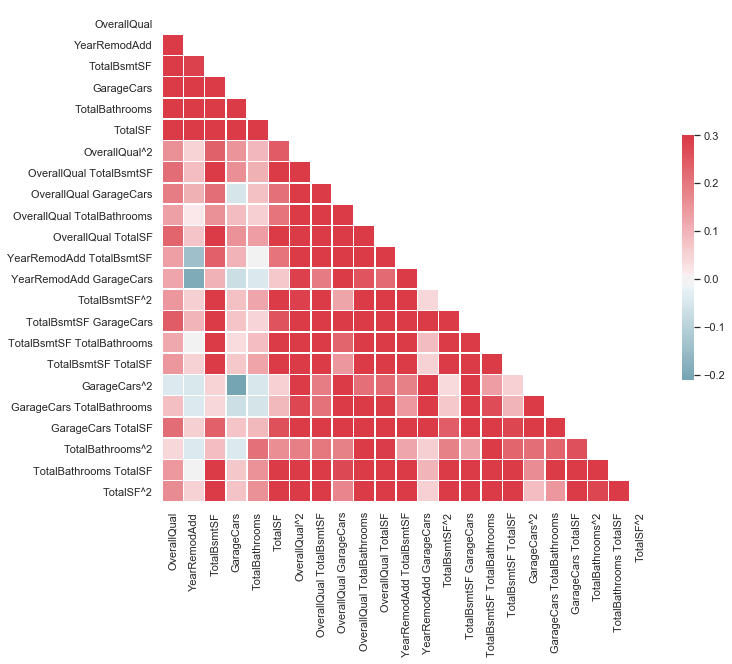

In [48]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
corr_matrix = features_selected_train.corr().abs()

In [50]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [51]:
to_drop = [column for column in upper.columns if any(upper[column] > .69)]

In [52]:
to_drop

['TotalSF',
 'OverallQual TotalSF',
 'YearRemodAdd TotalBsmtSF',
 'TotalBsmtSF^2',
 'TotalBsmtSF TotalBathrooms',
 'TotalBsmtSF TotalSF',
 'GarageCars TotalSF',
 'TotalBathrooms TotalSF',
 'TotalSF^2']

In [53]:
features_selected_train.drop(columns=to_drop, inplace=True)


In [54]:
features_selected_train.shape

(1168, 14)

In [55]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)

In [56]:
from sklearn import metrics
features_selected_test = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq. Errro:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# z-score
print('Z Score:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())

Mean Absolute Error: 26450.283065756877
Mean Squared Error: 1719661300.875021
Root Mean Sq. Errro: 41468.79912506535
Z Score: 0.514773113644523


In [57]:
#GET RSQUAREDDDD